# Examples

In [3]:
from pipeline.data.composers.chained_composer import ChainedComposer
from pipeline.data.composers.blocks.file_filtering import *
from pipeline.data.composers.blocks.file_preprocessing import *
from pipeline.data.composers.blocks.file_chunking import *
from pipeline.data.composers.blocks.chunk_ranking import *
from pipeline.data.composers.blocks.chunk_sorting import *
from pipeline.data.composers.blocks.chunk_harvesting import *
from pipeline.data.composers.blocks.context_postprocessing import *

import os
from itertools import chain

In [4]:
toy_sample = {
    'repo': 'composers',
    'commit_hash': 'lalala',
    'completion_file': {
        'filename': ...,
        'content': ...,
    },
    'completion_lines': {
        'infile': [1, 2, 3],
        'inproject': [4, 5, 6],
        'common': [7, 8, 9],
        'commited': [10, 11, 12],
        'non_informative': [13, 14, 15],
        'random': [16, 17, 18],
    },
    'repo_snapshot': {
        'filename': [],
        'content': [],
    },
}

In [5]:
path2pipeline = '../pipeline'
path2configs = '../configs'

for directory, _, filenames in chain(os.walk(path2pipeline), os.walk(path2configs)):
    if '__pycache__' in directory:
        continue
    
    for filename in filenames:
        filename = os.path.join(directory, filename)
        
        with open(filename) as file:
            content = file.read()
        
        toy_sample['repo_snapshot']['filename'].append(filename)
        toy_sample['repo_snapshot']['content'].append(content)
        
toy_sample['completion_file']['filename'] = toy_sample['repo_snapshot']['filename'].pop(0)
toy_sample['completion_file']['content'] = toy_sample['repo_snapshot']['content'].pop(0)

In [6]:
composer_kwargs = dict(
    pre_context_prompt="# {}\n",
    post_context_prompt="\n\n",
    path_comment_template="# {filename}\n{content}",  # to format completion file
    recalculate_random_category=False,
)

### Classical Path Distance Composer

In [7]:
composer = ChainedComposer([
    FileGrainedChunker(),
    NegativePathDistanceRanker(),
    LexicographicSorter(),
    PathCommentHarvester(chunks_sep='\n\n', path_comment_template='# {filename}\n{content}'),
],
    **composer_kwargs,
)

In [8]:
# you can access the composer initialization code by using its __repr__
repr(composer)

"ChainedComposer([FileGrainedChunker(), NegativePathDistanceRanker(), LexicographicSorter(), PathCommentHarvester(chunks_sep='\n\n', path_comment_template='# {filename}\n{content}')], pre_context_prompt='# {}\n', post_context_prompt='\n\n', path_comment_template='# {filename}\n{content}', recalculate_random_category=False)"

In [9]:
composed_sample = composer.compose(toy_sample)
composed_sample.keys()

dict_keys(['pre_context_prompt', 'composed_context', 'composed_completion', 'completion_lines'])

In [10]:
# repo identifier
composed_sample['pre_context_prompt']

'# composers\n'

In [11]:
# completion lines are corrected w.r.t. pre_context_prompt length
composed_sample['completion_lines']

{'infile': [2, 3, 4],
 'inproject': [5, 6, 7],
 'common': [8, 9, 10],
 'commited': [11, 12, 13],
 'non_informative': [14, 15, 16],
 'random': [17, 18, 19]}

In [12]:
# default way to compose a completion part
print(composed_sample['composed_completion'])

# ../pipeline/__main__.py
from pipeline.data.composers.init import init_composer
from pipeline.data.dataset import train_test_split, set_transform
from pipeline.data.preprocessors.init import init_preprocessor
from pipeline.model.init import init_tokenizer_model
from pipeline.outputs.checkpointers.init import init_checkpointer
from pipeline.outputs.loggers.init import init_logger
from pipeline.trainers.init import init_trainer

import os
import sys

import hydra
from datasets import load_dataset
from hydra.core.hydra_config import HydraConfig
from omegaconf import DictConfig

LCA_SOLVERS_DIR = os.path.dirname(os.path.dirname(__file__))

# configs
CONFIGS_DIR = os.path.join(LCA_SOLVERS_DIR, 'configs')
MAIN_CONFIG = 'defaults'

# run directory
RUNS_DIR = os.path.join(LCA_SOLVERS_DIR, 'runs')
ARGV_SH_FILE = 'run_script.sh'
CHECKPOINTS_DIR = 'checkpoints'
LOGS_DIR = 'logs'


# TODO: unify init functions


@hydra.main(config_path=CONFIGS_DIR, config_name=MAIN_CONFIG, version_base=None)
def 

In [13]:
# henceforth, only the composed context is shown for each composer
print(composed_sample['composed_context'])

# ../configs/composer/chained_composer/blocks/file_preprocessing/empty_lines_removal_preprocessor/no_args.yaml


# ../configs/composer/chained_composer/blocks/file_preprocessing/declaration_only_preprocessor/no_args.yaml


# ../configs/composer/chained_composer/blocks/file_chunking/file_grained_chunker/no_args.yaml


# ../configs/composer/chained_composer/blocks/file_chunking/code_segment_grained_chunker/no_args.yaml


# ../configs/composer/chained_composer/blocks/chunk_harvesting/joining_harvester/double_newline.yaml
chunks_sep: "\n\n"


# ../configs/composer/chained_composer/blocks/chunk_harvesting/path_comment_harvester/empty.yaml
chunks_sep: "\n\n"
path_comment_template: '{content}'


# ../configs/composer/chained_composer/blocks/chunk_harvesting/path_comment_harvester/standard.yaml
chunks_sep: "\n\n"
path_comment_template: "# {filename}\n{content}"


# ../configs/composer/chained_composer/blocks/chunk_sorting/lexicographic_sorter/no_args.yaml


# ../configs/composer/chained_compos

### Declaration Only Composer

In [14]:
composer = ChainedComposer([
    InclusiveFileExtensionFilter(whitelist=['.py']),  # include only .py files
    DeclarationOnlyPreprocessor(),
    FileGrainedChunker(),
    RandomRanker(random_seed=42),
    LexicographicSorter(),
    PathCommentHarvester(chunks_sep='\n\n', path_comment_template='# {filename}\n{content}'),
],
    **composer_kwargs,
)

In [15]:
composed_sample = composer.compose(toy_sample)
print(composed_sample['composed_context'])

# ../pipeline/outputs/metrics/counters.py
class EpochCounter(StatisticBase): ...
    def __new__(cls: Type[T], *args, **kwargs) -> T: ...
    def __init__(self) -> None: ...
    def reinit(self, init_epoch: float | None) -> None: ...
    def micro_batch_update(self, input_ids: torch.Tensor, trainer: FullFineTuningTrainer, **_kwargs) -> None: ...
    def batch_commit(self) -> StatisticValue: ...

# ../pipeline/trainers/trainers_registry.py


# ../pipeline/configs/model_config.py
class ModelConfig(ConfigBase): ...
    def __post_init__(self) -> None: ...

# ../pipeline/data/composers/utils.py
class ReprMixin: ...
    def __init_subclass__(cls, **kwargs) -> None: ...
        def wrapped_init(self, *init_args, **init_kwargs) -> None: ...
    def __repr__(self) -> str: ...

# ../pipeline/data/composers/blocks/chunk_harvesting.py
class ChunkHarvester(ComposerBlock, ABC): ...
    def next_blocks(self) -> tuple[Type[ComposerBlock], ...]: ...
class JoiningHarvester(ChunkHarvester): ...
    def 

### Double Ranking Composer

In [16]:
composer = ChainedComposer([
    FileLengthFilter(min_len=100, max_len=float('inf')),
    EmptyLinesRemovalPreprocessor(),
    CodeSegmentGrainedChunker(),
    FunctionCallRanker(is_relative=True),  # first sort criterion
    NegativePathDistanceRanker(),  # second sort criterion
    LexicographicSorter(),
    JoiningHarvester(chunks_sep='\n--------------- NEW FILE ---------------\n'),
],
    **composer_kwargs,
)

In [17]:
composed_sample = composer.compose(toy_sample)
print(composed_sample['composed_context'])

# Iteration parameters
max_iters: 600
valid_freq: 25
checkpointing_freq: 25
gradient_accumulation_steps: 64
micro_batch_size: 1
# AdamW optimizer
learning_rate: 7.0e-5
beta_1: 0.9
beta_2: 0.999
weight_decay: 0.01
max_grad_norm: 2
# Cosine lr scheduler with warmup
warmup_iters: 25
lr_decay_iters: 600
min_lr: 1.0e-7
# Metrics
train_metrics: [
  cross_entropy,
  detached_cross_entropy,
  completion_cross_entropy,
  context_cross_entropy,
  full_cross_entropy,
  commited_cross_entropy,
  common_cross_entropy,
  infile_cross_entropy,
  inproject_cross_entropy,
  non_informative_cross_entropy,
  random_cross_entropy,
  epoch,
  learning_rate,
]
train_ema_alpha: 0.01
valid_metrics: [
  cross_entropy,
  detached_cross_entropy,
  completion_cross_entropy,
  context_cross_entropy,
  full_cross_entropy,
  commited_cross_entropy,
  common_cross_entropy,
  infile_cross_entropy,
  inproject_cross_entropy,
  non_informative_cross_entropy,
  random_cross_entropy,
  epoch,
]
valid_ema_alpha: null
# Dat

### Extension Ranking Composer

In [18]:
composer = ChainedComposer([
    FileGrainedChunker(),
    FileExtensionRanker([['.py'], ['.yaml']]),  # YAML files are placed at the end
    LexicographicSorter(),
    PathCommentHarvester(chunks_sep='\n\n', path_comment_template='# {filename}\n{content}'),
    LineStripPostprocessor(),
],
    **composer_kwargs,
)

In [19]:
composed_sample = composer.compose(toy_sample)
print(composed_sample['composed_context'])

# ../pipeline/environment/hardware.py
import subprocess
import warnings

import torch


def get_free_device(used_memory_upper_bound: float = 0.001) -> torch.device:
if hasattr(get_free_device, 'allocated'):
return get_free_device.allocated

for gpu_index in range(torch.cuda.device_count()):
gpu_pid_stats = subprocess.check_output([
'nvidia-smi', f'-i={gpu_index}', '--query-compute-apps=pid', '--format=csv,noheader',
], encoding='utf-8')
gpu_mem_stats = subprocess.check_output([
'nvidia-smi', f'-i={gpu_index}', '--query-gpu=memory.used,memory.total', '--format=csv,noheader',
], encoding='utf-8')

mem_used, mem_total = map(int, gpu_mem_stats.replace('MiB', '').split(', '))

if not gpu_pid_stats and mem_used / mem_total <= used_memory_upper_bound:
get_free_device.allocated = torch.device(f'cuda:{gpu_index}')
return get_free_device.allocated

warnings.warn('No CUDA devices were found. CPU will be used.')
return torch.device('cpu')


def get_optimal_dtype() -> torch.dtype:
if torch.cuda.is_

### Half-Memory Composer without Ranking

In [20]:
composer = ChainedComposer([
    EmptyLinesRemovalPreprocessor(),
    FileGrainedChunker(),
    JoiningHarvester(chunks_sep='\n'),
    PartialMemoryPostprocessor(dropout=0.5, random_seed=42),
],
    **composer_kwargs,
)

In [21]:
composed_sample = composer.compose(toy_sample)
print(composed_sample['composed_context'])

import subprocess
    if hasattr(get_free_device, 'allocated'):
        return get_free_device.allocated
    for gpu_index in range(torch.cuda.device_count()):
            'nvidia-smi', f'-i={gpu_index}', '--query-gpu=memory.used,memory.total', '--format=csv,noheader',
        if not gpu_pid_stats and mem_used / mem_total <= used_memory_upper_bound:
            get_free_device.allocated = torch.device(f'cuda:{gpu_index}')
    warnings.warn('No CUDA devices were found. CPU will be used.')
    return torch.device('cpu')
    if torch.cuda.is_available() and torch.cuda.is_bf16_supported():
        return torch.bfloat16
                      'with gradient scaling will be used instead.')
ID2CATEGORY = [
    'commited',
    'common',
    'infile',
    'inproject',
    'non_informative',
    'other',
]
CATEGORY2ID = {category: i for i, category in enumerate(ID2CATEGORY)}
UNDEFINED_CATEGORY_ID = -1
from pipeline.data.composers.composer_base import ComposerBase
from pipeline.data.preprocessors.

# Base Composer

In general, a composer constructs a new _composed_ data point from the raw one. For this purpuse, it devides the data into four main parts:

1. Leading prompt, `get_pre_context_prompt` method.
2. Composed context, `compose_context` method.
3. Prompt following context, `get_post_context_prompt` method.
4. Composed completion, `compose_completion` method.

In the simplest case, the leading prompt could be an empty string or the repository identifier, and the post-context prompt could be just a separator between the two main parts — context and completion. Now, let's focus on how we can compose context. 

# Chained Composer

A more general approach is to inherit from `ComposerBase` class and implement the corresponding method. It is a quick but not scalable solution in terms of efficient search space exploration. That's why we propose a more robust way of defining the composition pipeline — a chain of individual blocks.

Types of such blocks:

1. `FileFilter`, **file_filtering** module.
2. `FilePreprocessor`, **file_preprocessing** module.
3. `FileChunker`, **file_chunking** module.
4. `ChunkRanker`, **chunk_ranking** module.
5. `ChunkSorter`, **chunk_sorting** module.
6. `ChunkHarvester`, **chunk_harvesting** module.
7. `ContextPostprocessor`, **context_postprocessing** module.

See below for more details.

The next graph illustrates:

- The available order of blocks,
- How optional their use is (the red part indicates optionality),
- Data structure transitions: **Files -> Chunks -> Context** (blue vertical lines).

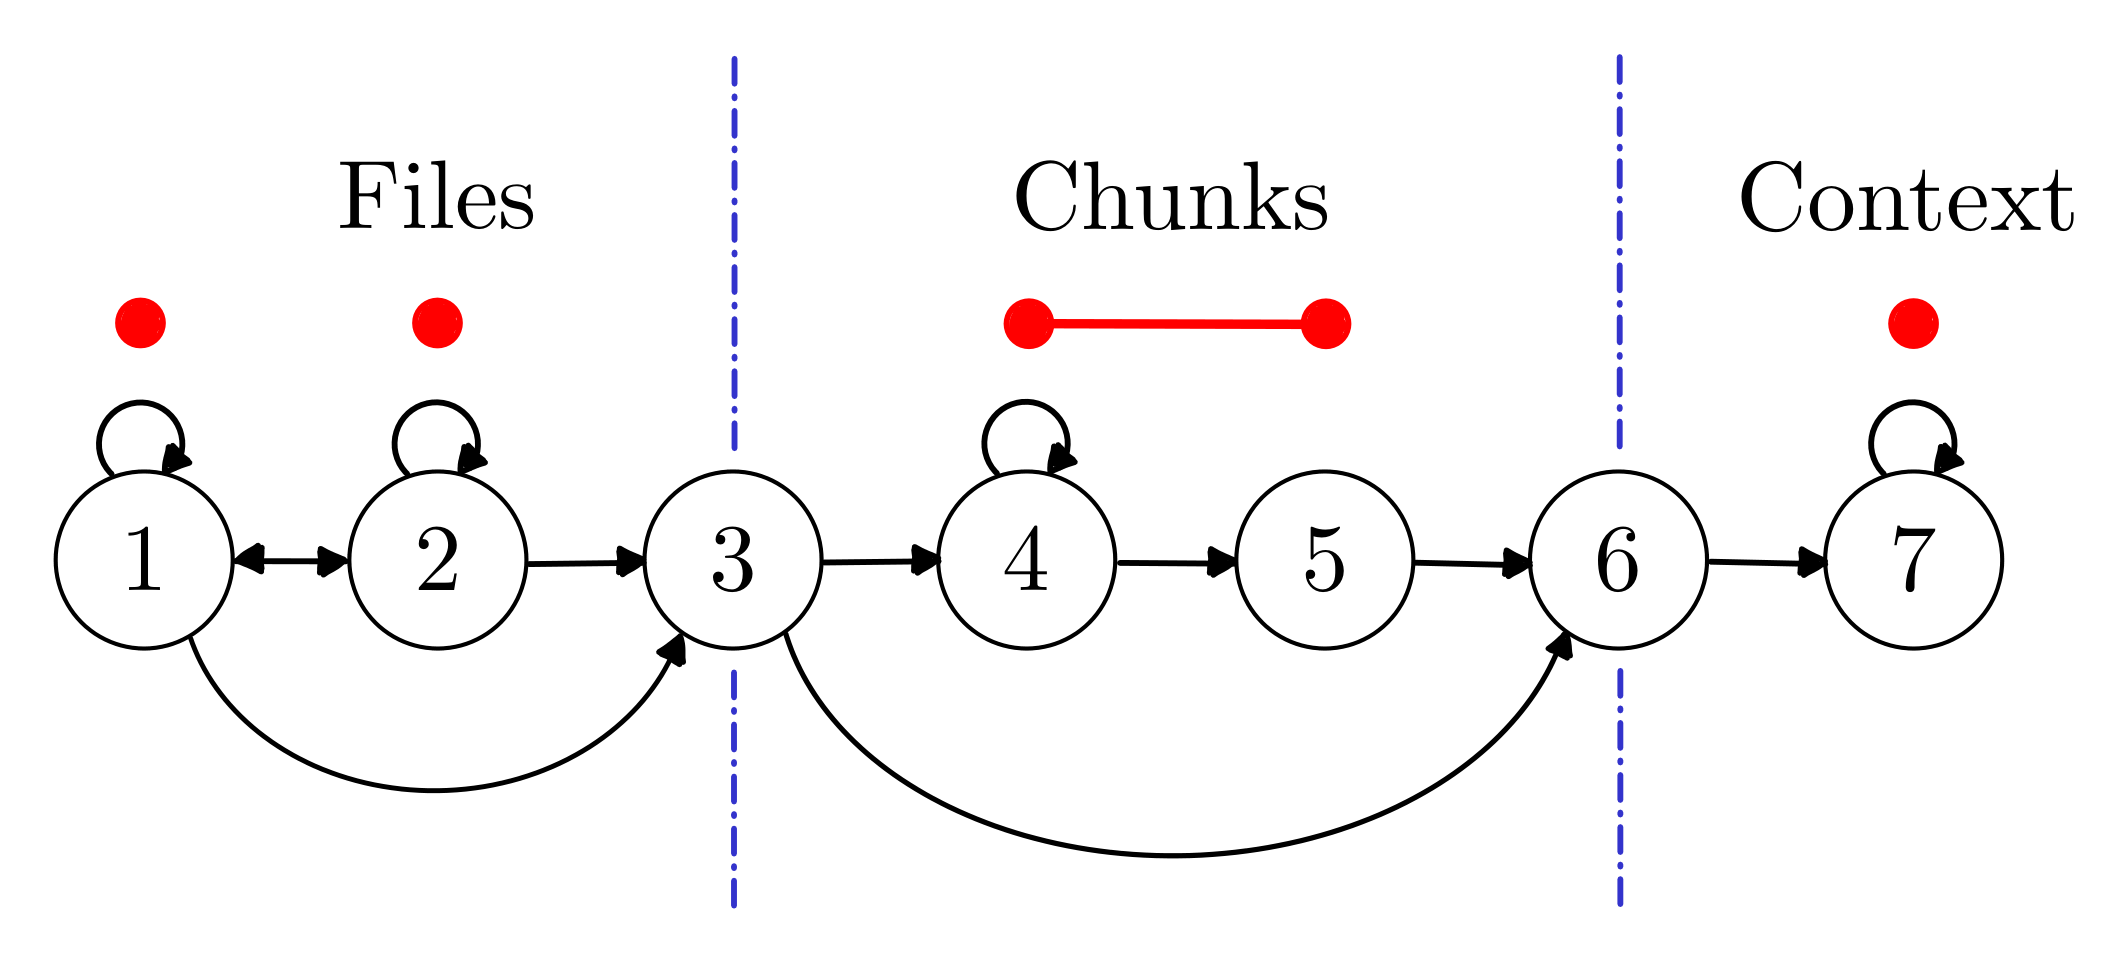

In [2]:
from PIL import Image
Image.open('../extra/attachments/chained_composer.png')

## file_filtering

**Abstract class**: `FileFilter`. \
**Purpose**: Filter out unwanted files. \
**Currently implemented**:

- `InclusiveFileExtensionFilter` for selecting files by their extensions,
- `ExclusiveFileExtensionFilter` for removing files by their extensions,
- `EmptyFileFilter` for removing empty files,
- `FileLengthFilter` for removing files that are too short or long (at the character level),
- `TokenizedFileLengthFilter` for removing files that are too short or long (at the token level),
- `CharTokenRatioFilter` for removing files with a low or high character-to-token ratio.

## file_preprocessing

**Abstract class**: `FilePreprocessor`. \
**Purpose**: File-level content modification. \
**Currently implemented**:

- `EmptyLinesRemovalPreprocessor` for removing empty lines,
- `DeclarationOnlyPreprocessor` for extracting function and class declarations.

## file_chunking

**Abstract class**: `FileChunker`. \
**Purpose**: Convert a set of files into chunks, change granularity. \
**Currently implemented**:

- `FileGrainedChunker` for assining a one-to-one relationship (can be understood as _no chunking_),
- `CodeSegmentGrainedChunker` for splitting one Python file into four blocks: imports, docstrings, ≥3 lines comments, and code.

## chunk_ranking

**Abstract class**: `ChunkRanker`. \
**Purpose**: Determine the importance of a chunk. \
**Currently implemented**:

- `NegativePathDistanceRanker` based on the same idea as presented in the LCA paper,
- `FileExtensionRanker` for prioritizing some extensions over others,
- `FunctionCallRanker` for prioritizing chunks with a higher number of function calls,
- `RandomRanker` for shuffling chunks.

## chunk_sorting

**Abstract class**: `ChunkSorter`. \
**Purpose**: Sort a set of chunks based on their ranks. \
**Currently implemented**:

- `LexicographicSorter` preserves rankers order.

## chunk_harvesting

**Abstract class**: `ChunkHarvester`. \
**Purpose**: Join sorted chunks. \
**Currently implemented**:

- `JoiningHarvester` uses the provided string as a separator,
- `PathCommentHarvester` adds information about the file's position in the project.

## context_postprocessing

**Abstract class**: `ContextPostprocessor`. \
**Purpose**: Context-level content modification. \
**Currently implemented**:

- `PartialMemoryPostprocessor` for dropping some lines with a given probability,
- `LineLengthPostprocessor` for removing lines that are too short or long,
- `LineStripPostprocessor` for stripping lines.